In [1]:
result_path = '../results'

In [2]:
import pandas as pd
import os

In [3]:
dflist = []
for file in os.listdir(result_path):
    if file.endswith('.csv'):
        dflist.append(pd.read_csv(os.path.join(result_path,file)))

result = pd.concat(dflist)

In [4]:
result

,dataset,sample_size_20,sample_size_40,sample_size_60,sample_size_80,sample_size_100
0,A0A247D711_LISMN_Stadelmann_2021.csv,0.243991,0.293715,0.289766,0.288814,0.260603
0,ADRB2_HUMAN_Jones_2020.csv,0.514605,0.524856,0.515402,0.524962,0.525122
0,ARGR_ECOLI_Tsuboyama_2023_1AOY.csv,0.629545,0.655396,0.626203,0.624404,0.636035
0,A4GRB6_PSEAI_Chen_2020.csv,0.674121,0.672959,0.674080,0.679170,0.674696
0,A4_HUMAN_Seuma_2022.csv,0.363994,0.379790,0.386594,0.344695,0.380985
0,ANCSZ_Hobbs_2022.csv,0.598536,0.604558,0.628546,0.629514,0.629842
0,A0A1I9GEU1_NEIME_Kennouche_2019.csv,0.065875,0.108985,0.110490,0.063234,0.063978
0,A0A2Z5U3Z0_9INFA_Doud_2016.csv,0.576616,0.558641,0.574320,0.572751,0.575562
0,BBC1_YEAST_Tsuboyama_2023_1TG0.csv,0.633497,0.637278,0.657070,0.656866,0.656678
0,A0A2Z5U3Z0_9INFA_Wu_2014.csv,0.413941,0.416805,0.412423,0.429561,0.460256


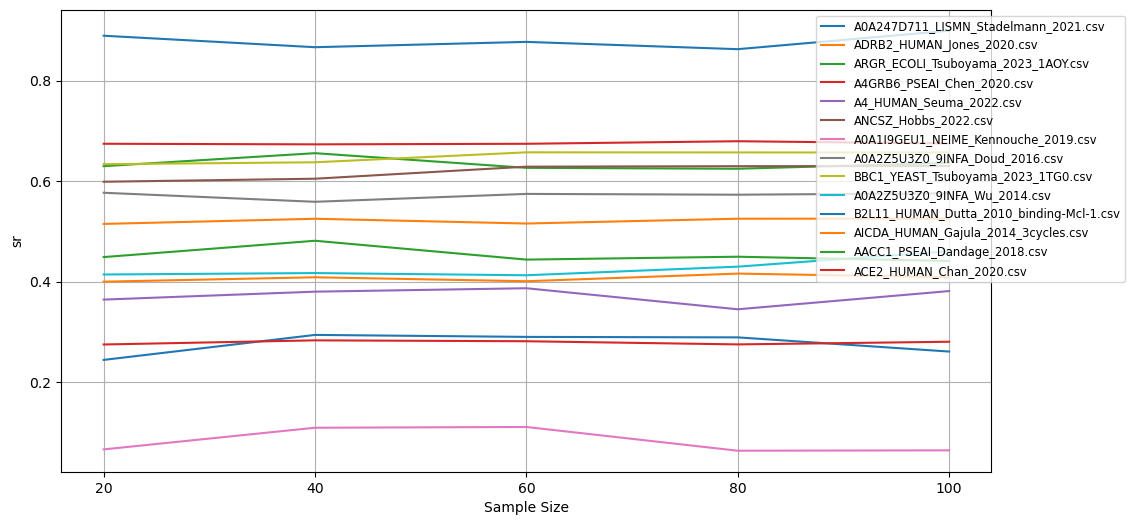

In [5]:
# 绘制折线图
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

for index, row in result.iterrows():
    plt.plot(['20', '40', '60', '80', '100'], row[1:], label=row['dataset'])

plt.xlabel('Sample Size')
plt.ylabel('sr')

plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

In [6]:
pltdata = result.iloc[:,1:]

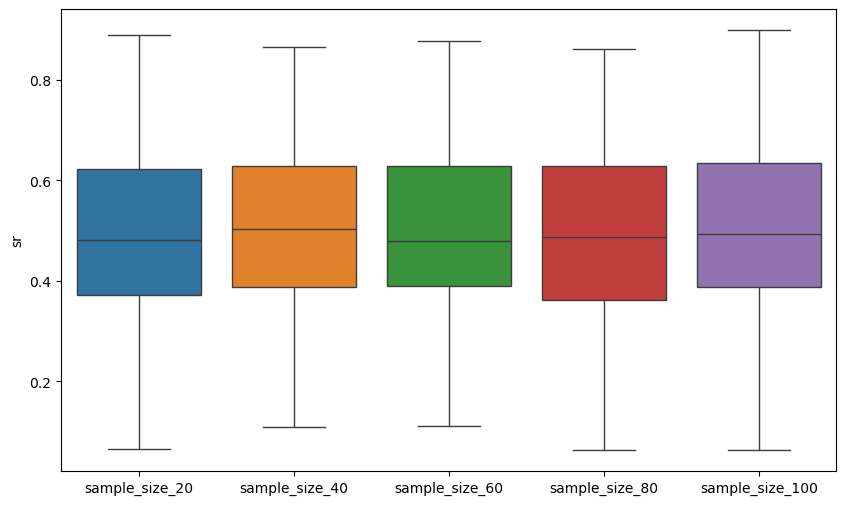

In [7]:
# 绘制箱线图
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=pltdata)
plt.ylabel('sr')
plt.show()

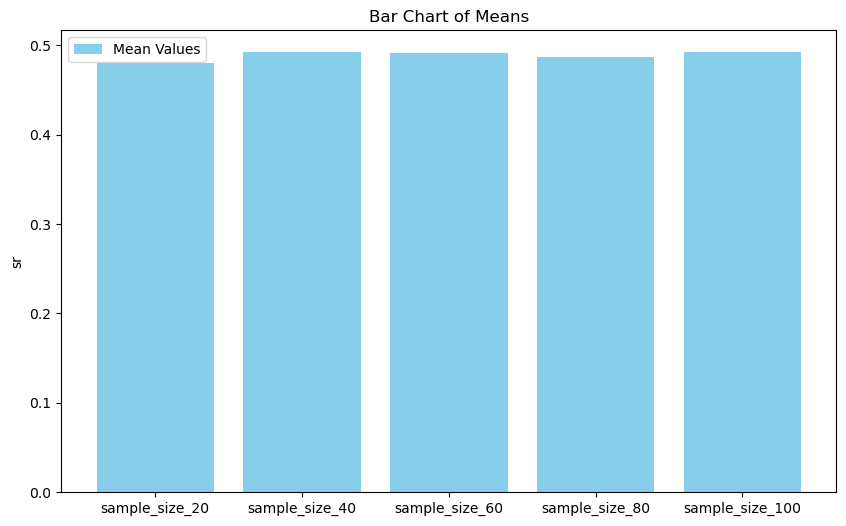

In [8]:
means = pltdata.mean()

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(means.index, means.values, color='skyblue', label='Mean Values')
plt.title('Bar Chart of Means')

plt.ylabel('sr')
plt.legend()
plt.show()

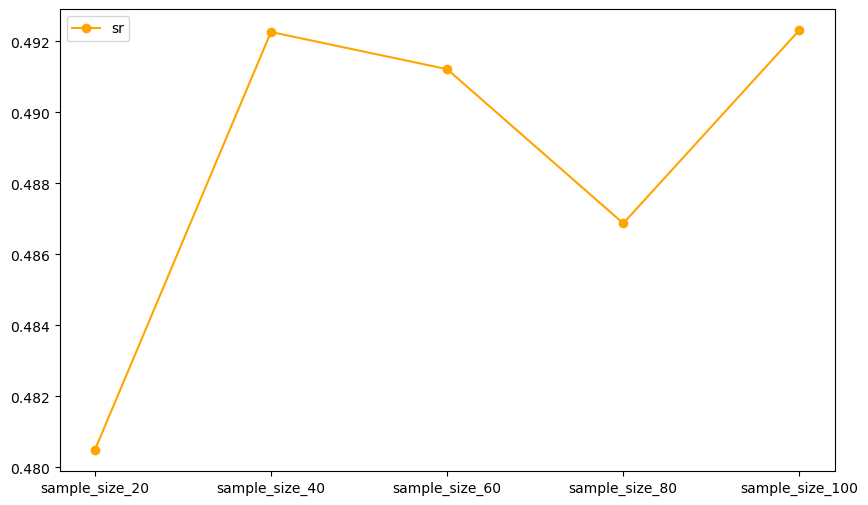

In [9]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(means.index, means.values, marker='o', linestyle='-', color='orange', label='sr')

plt.legend()

In [11]:
zsdata = pd.read_csv('./data_spearman.csv')

In [12]:
zsdata

,dataset,spearman
0,NPC1_HUMAN_Erwood_2022_HEK293T.csv,0.298915
1,AMFR_HUMAN_Tsuboyama_2023_4G3O.csv,0.180095
2,A0A247D711_LISMN_Stadelmann_2021.csv,0.087851
3,CSN4_MOUSE_Tsuboyama_2023_1UFM.csv,0.565964
4,R1AB_SARS2_Flynn_2022.csv,-0.029931
...,...,...
83,P53_HUMAN_Giacomelli_2018_Null_Nutlin.csv,0.447191
84,TNKS2_HUMAN_Tsuboyama_2023_5JRT.csv,0.591904
85,NPC1_HUMAN_Erwood_2022_RPE1.csv,0.216494
86,OBSCN_HUMAN_Tsuboyama_2023_1V1C.csv,0.582299


In [13]:
intersected_df = pd.merge(zsdata,result, on=['dataset'], how='inner')

In [14]:
intersected_df

,dataset,spearman,sample_size_20,sample_size_40,sample_size_60,sample_size_80,sample_size_100
0,A0A247D711_LISMN_Stadelmann_2021.csv,0.087851,0.243991,0.293715,0.289766,0.288814,0.260603
1,ACE2_HUMAN_Chan_2020.csv,0.172980,0.274650,0.282903,0.281113,0.274825,0.280104
2,A0A2Z5U3Z0_9INFA_Doud_2016.csv,0.516478,0.576616,0.558641,0.574320,0.572751,0.575562
3,A0A2Z5U3Z0_9INFA_Wu_2014.csv,0.460629,0.413941,0.416805,0.412423,0.429561,0.460256
4,AACC1_PSEAI_Dandage_2018.csv,0.482986,0.448611,0.481094,0.443576,0.449327,0.440840
5,B2L11_HUMAN_Dutta_2010_binding-Mcl-1.csv,-0.019325,0.889153,0.866289,0.876869,0.862366,0.899090
6,BBC1_YEAST_Tsuboyama_2023_1TG0.csv,0.477341,0.633497,0.637278,0.657070,0.656866,0.656678
7,AICDA_HUMAN_Gajula_2014_3cycles.csv,0.375598,0.399657,0.408404,0.400559,0.415731,0.408609
